In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import matplotlib
from matplotlib.patches import ConnectionPatch

import warnings
warnings.filterwarnings('ignore')

locale.setlocale(locale.LC_ALL, 'tr_TR.utf8')

'tr_TR.utf8'

In [2]:
# Loading data
data = pd.read_csv("./data/10_may_vaccination_data.csv")
tr_population = pd.read_excel('./data/tr-population-by-years.xls')

In [3]:
# Inspecting data
display(tr_population.head())
display(data.head())

,Category,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100,...,74724269,75627384,76667864,77695904,78741053,79814871,80810525,82003882,83154997,83614362
1,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319,...,2108805,2125635,2149260,2165595,2183167,2201670,2216475,2220125,2237940,2258718
2,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067,...,593931,595261,597184,597835,602774,610484,615076,624513,626465,632459
3,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365,...,698626,703948,707123,706371,709015,714523,715693,725568,729483,736912
4,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180,...,555479,552404,551177,549435,547210,542255,536285,539657,536199,535435


,city,total,first_,second_
0,adana,604533,355061,249472
1,adıyaman,134323,78503,55820
2,afyon,236602,135197,101405
3,ağrı,62582,42718,19864
4,amasya,151551,85487,66064


In [4]:
# Extracting the total population of Turkey in 2020
tr_2020_pop = tr_population.iloc[0, 21]
display(tr_2020_pop)

83614362

In [5]:
# Converting [first dose, second_dose] to numpy array
veri = data.iloc[:,2:].to_numpy()
display(veri[:5])

array([[355061, 249472],
       [ 78503,  55820],
       [135197, 101405],
       [ 42718,  19864],
       [ 85487,  66064]])

In [6]:
# Matplotlib graph customizations
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [7]:
# 2020 populations of the cities
city_pops = tr_population.loc[1:,2020].reset_index().drop('index', axis=1).to_numpy()

In [8]:
# Adding city_pops to the vaccination data
data['city_total'] = city_pops

In [9]:
# Sorting the columns
data = data[['city', 'city_total', 'total', 'first_', 'second_',]]

In [10]:
data_general = data.iloc[:,[1,2]].to_numpy() # [city_total, total] columns
data_vaccinated = data.iloc[:, 3:].to_numpy() # [first_, second_] columns

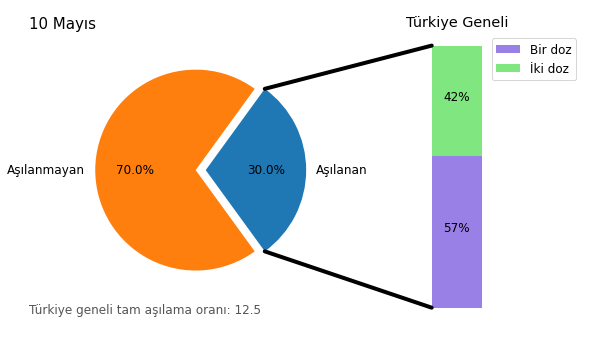

In [11]:
vaccinated = veri.sum(axis=0)[0] + veri.sum(axis=0)[1] # first dose + second dose
not_vaccinated = tr_2020_pop - vaccinated # total population - vaccinated

sizes = veri.sum(axis=0); # first dose total - second dose total
general = np.array([not_vaccinated, vaccinated])

asilanmayan_sayi = general[0] # not vaccinated population total
asilanan_sayi = general[1] # vaccinated population total

ilk_doz_olan_sayi = sizes[0] # first dose total
ikinci_doz_olan_sayi = sizes[1] # second dose total

# Make figure and assign axis objects
fig = plt.figure(figsize=(9, 5), facecolor=(1, 1, 1)) # setting background color to white
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# Pie chart parameters
ratios = [(round((asilanan_sayi * 100) / general.sum())) / 100, (round((asilanmayan_sayi * 100) / general.sum())) / 100]
labels = ['Aşılanan', 'Aşılanmayan']
explode = [0, 0.1]

# Rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# Bar chart parameters
xpos = 0
bottom = 0
ratios = [(round((ilk_doz_olan_sayi * 100) / sizes.sum())) / 100, (round((ikinci_doz_olan_sayi * 100) / sizes.sum())) / 100]
width = .2
colors = [[.6, .5, .9], [.5, .9, .5]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Türkiye Geneli')
ax2.legend(('Bir doz', 'İki doz'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# Use ConnectionPatch to draw lines between the two plots
# Get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# Drawing top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# Drawing bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

x = data.second_.sum(axis=0)
y = data.city_total.sum(axis=0)

ax1.annotate(
    'Türkiye geneli tam aşılama oranı: ' + str(round((x * 100) / y,1)), 
    xy=(0.05, 0.1), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=12, 
    color='#555555')

ax1.annotate(
    '10 Mayıs', 
    xy=(0.05, 0.95), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=15, 
    color='#000000')

#plt.savefig('graphs/genel-durum', bbox_inches="tight");
#plt.clf();
plt.show()

In [12]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [13]:
# for loop to plot every city graph
for i in range(81):
    
    city_name = data.city[data.index == i].item()
    
    general_asilanmayan = data_general[i,0] - data_general[i,1]
    general_asilanan = data_general[i,1]
    general = np.array([general_asilanmayan, general_asilanan])
    vaccinated = data_vaccinated[i,:]
    
    asilanmayan_sayi = general[0]
    asilanan_sayi = general[1]
    
    birinci_doz_olan_sayi = vaccinated[0]
    ikinci_doz_olan_sayi = vaccinated[1]

    # make figure and assign axis objects
    fig = plt.figure(figsize=(9, 5), facecolor=(1, 1, 1))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)

    # Pie chart parameters
    ratios = [
        (round((asilanan_sayi * 100) / general.sum())) / 100, 
        (round((asilanmayan_sayi * 100) / general.sum())) / 100
    ]
    labels = ['Aşılanan', 'Aşılanmayan']
    explode = [0, 0.1]
    # rotate so that first wedge is split by the x-axis
    angle = -180 * ratios[0]
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode)

    # Bar chart parameters
    xpos = 0
    bottom = 0
    ratios = [
        (round((birinci_doz_olan_sayi * 100) / vaccinated.sum())) / 100, 
        (round((ikinci_doz_olan_sayi * 100) / vaccinated.sum())) / 100
    ]
    width = .2
    colors = [[.6, .5, .9], [.5, .9, .5]]

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100), ha='center')

    ax2.set_title(city_name.capitalize())
    ax2.legend(('Bir doz', 'İki doz'))
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # Using ConnectionPatch to draw lines between the two plots
    # Getting the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # Drawing top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(
        xyA=(- width / 2, bar_height), xyB=(x, y), 
        coordsA="data", coordsB="data", 
        axesA=ax2, axesB=ax1
    )
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # Drawing bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    
    con = ConnectionPatch(
        xyA=(- width / 2, 0), xyB=(x, y), 
        coordsA="data", coordsB="data", 
        axesA=ax2, axesB=ax1
    )
    
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)
    
    x = data.iloc[i,4]
    y = data.iloc[i,1]
    
    ax1.annotate(
    str(data.iloc[i,0]).capitalize() + ' geneli tam aşılama oranı: ' + str(round((x * 100) / y  , 1)), 
    xy=(0.05, 0.1), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=12, 
    color='#555555')
    
    ax1.annotate(
    '10 Mayıs', 
    xy=(0.05, 0.95), 
    xycoords='figure fraction', 
    horizontalalignment='left', 
    verticalalignment='top', 
    fontsize=15, 
    color='#000000')
    
    plt.savefig(
        'graphs/' + data.city[data.index == i].item(), facecolor=fig.get_facecolor(), transparent=True
    );
    
    plt.clf();
#plt.show()

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>

<Figure size 648x364.5 with 0 Axes>